In [1]:
import numpy as np
import matplotlib.cm as cm
object_colors = cm.nipy_spectral(np.linspace(0, 1, 12))
label_colours = []
for index, val in enumerate(object_colors):
    val = val*256
    val = [ int(x) for x in val ]
    label_colours.append(tuple(val[:3]))

print label_colours

[(0, 0, 0), (133, 0, 150), (0, 0, 201), (0, 133, 221), (0, 170, 160), (0, 156, 0), (0, 218, 0), (132, 256, 0), (248, 218, 0), (256, 93, 0), (218, 0, 0), (204, 204, 204)]


In [7]:
import os
import sys
import matplotlib.pyplot as plt
%matplotlib inline


# call this script from the directory which has both the *label*.png and *predlabels*.png files

dir_full_path = "/home/peteflo/tensorflow-deeplab-resnet/output_all_12labels_sixobjects_networks_multi_test/"

with open(os.path.join(dir_full_path,"summary.txt")) as f:
        content = f.readlines()

content = [x.strip() for x in content]

# x axis is hz
x_axis = [1, 2, 3, 4, 5, 6, 7]

ious_by_label = {}
std_by_label = {}

object_name_to_label = {}

for i in content:
    split = i.split()
    if len(split) == 1:
        trial_name = i
        print "trial name", i
        continue

    label_number = split[0]
    iou          = split[1]
    std          = split[2]
    object_name  = split[3]
    
    object_name_to_label[object_name] = int(label_number)

    if object_name not in ious_by_label.keys():
        ious_by_label[object_name] = []
        std_by_label[object_name] = []

    ious_by_label[object_name].append(float(iou))
    std_by_label[object_name].append(float(std))

trial name predlabels_12labels_sixobjects_01_single_train_18_scenes.png
trial name predlabels_12labels_sixobjects_02_multi_train_3_scenes.png
trial name predlabels_12labels_sixobjects_03_mixed_train_21_scenes.png
trial name predlabels_12labels_sixobjects_04_multi_train_18_scenes.png
trial name predlabels_12labels_sixobjects_05_mixed_train_36_scenes.png
trial name predlabels_12labels_sixobjects_multi_test_scenes.png
trial name predlabels_12labels_sixobjects_single_test_scenes.png


background
blue_funnel
cracker_box
drill
oil_bottle
spam
tissue_box


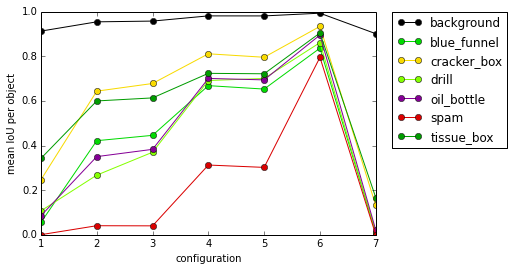

In [10]:
for object_name, val in sorted(ious_by_label.iteritems()):
    print object_name
    plt.plot(x_axis, val, 'o-', color=object_colors[object_name_to_label[object_name]][:3], label=object_name)
    #plt.errorbar(x_axis, val, std_by_label[object_name])

plt.xlabel("configuration")
plt.ylabel("mean IoU per object")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

[0.912655081458, 0.954118326021, 0.957508939768, 0.980810992955, 0.980657384945, 0.992891997054]


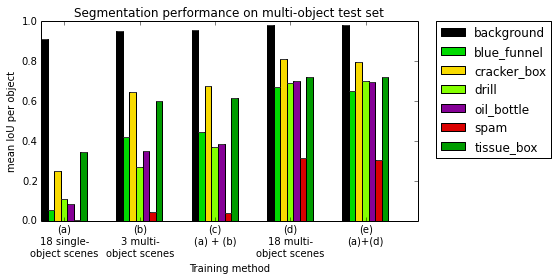

In [68]:
n_groups = 5

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35/4

opacity = 1.0
error_config = {'ecolor': '0.3'}

print ious_by_label['background'][:6]

for i, val in enumerate(sorted(ious_by_label.keys())):
    name = "rects_"+str(i)
    name = plt.bar(index+bar_width*i, tuple(ious_by_label[val][:5]), bar_width,
                 alpha=opacity,
                 color=object_colors[object_name_to_label[val]][:3],
                 yerr=0,
                 error_kw=error_config,
                 label=val)

plt.xlabel('Training method')
plt.ylabel('mean IoU per object')
plt.title('Segmentation performance on multi-object test set')
plt.xticks(0.3 + index + bar_width / 8, ('(a)\n18 single-\nobject scenes', 
                                         '(b)\n3 multi-\nobject scenes', 
                                         '(c)\n(a) + (b)', 
                                         '(d)\n18 multi-\nobject scenes', 
                                         '(e)\n(a)+(d)'))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.tight_layout()
plt.show()

In [70]:
import os
import sys
import matplotlib.pyplot as plt
%matplotlib inline


# call this script from the directory which has both the *label*.png and *predlabels*.png files

dir_full_path = "/home/peteflo/tensorflow-deeplab-resnet/output_all_12labels_sixobjects_networks_single_test/"

with open(os.path.join(dir_full_path,"summary.txt")) as f:
        content = f.readlines()

content = [x.strip() for x in content]

# x axis is hz
x_axis = [1, 2, 3, 4, 5, 6, 7]

ious_by_label = {}
std_by_label = {}

object_name_to_label = {}

for i in content:
    split = i.split()
    if len(split) == 1:
        trial_name = i
        print "trial name", i
        continue

    label_number = split[0]
    iou          = split[1]
    std          = split[2]
    object_name  = split[3]
    
    object_name_to_label[object_name] = int(label_number)

    if object_name not in ious_by_label.keys():
        ious_by_label[object_name] = []
        std_by_label[object_name] = []

    ious_by_label[object_name].append(float(iou))
    std_by_label[object_name].append(float(std))

trial name predlabels_12labels_sixobjects_01_single_train_18_scenes.png
trial name predlabels_12labels_sixobjects_02_multi_train_3_scenes.png
trial name predlabels_12labels_sixobjects_03_mixed_train_21_scenes.png
trial name predlabels_12labels_sixobjects_04_multi_train_18_scenes.png
trial name predlabels_12labels_sixobjects_05_mixed_train_36_scenes.png
trial name predlabels_12labels_sixobjects_multi_test_scenes.png
trial name predlabels_12labels_sixobjects_single_test_scenes.png


background
blue_funnel
cracker_box
drill
oil_bottle
spam
tissue_box


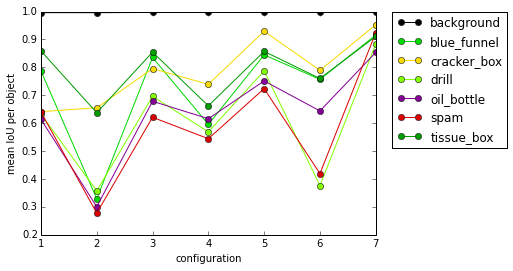

In [71]:
for object_name, val in sorted(ious_by_label.iteritems()):
    print object_name
    plt.plot(x_axis, val, 'o-', color=object_colors[object_name_to_label[object_name]][:3], label=object_name)
    #plt.errorbar(x_axis, val, std_by_label[object_name])

plt.xlabel("configuration")
plt.ylabel("mean IoU per object")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

[0.996306018681, 0.996168990429, 0.99692364854, 0.996985999733, 0.997468948903, 0.996861868135]


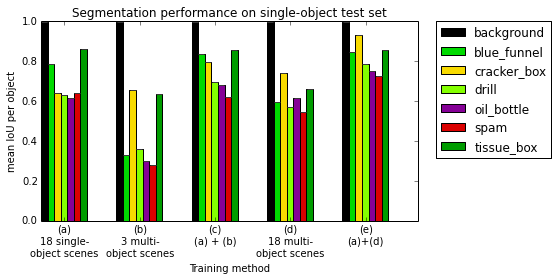

In [72]:
n_groups = 5

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35/4

opacity = 1.0
error_config = {'ecolor': '0.3'}

print ious_by_label['background'][:6]

for i, val in enumerate(sorted(ious_by_label.keys())):
    name = "rects_"+str(i)
    name = plt.bar(index+bar_width*i, tuple(ious_by_label[val][:5]), bar_width,
                 alpha=opacity,
                 color=object_colors[object_name_to_label[val]][:3],
                 yerr=0,
                 error_kw=error_config,
                 label=val)

plt.xlabel('Training method')
plt.ylabel('mean IoU per object')
plt.title('Segmentation performance on single-object test set')
plt.xticks(0.3 + index + bar_width / 8, ('(a)\n18 single-\nobject scenes', 
                                         '(b)\n3 multi-\nobject scenes', 
                                         '(c)\n(a) + (b)', 
                                         '(d)\n18 multi-\nobject scenes', 
                                         '(e)\n(a)+(d)'))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.tight_layout()
plt.show()